In [1]:
import numpy as np
import pandas as pd

In [34]:
data = pd.read_csv('synthetic_stroke_data.csv')
data.head()

id  gender   age  hypertension  heart_disease ever_married      work_type  \
0   1  Female  80.3             0              0          Yes       Govt_job   
1   2  Female  89.4             0              0          Yes  Self-employed   
2   3    Male  87.5             0              0          Yes       Children   
3   4    Male  19.7             0              0          Yes        Private   
4   5    Male  85.2             0              0          Yes       Children   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             170.38  18.4          Unknown       0  
1          Urban             186.89  19.6  formerly smoked       0  
2          Urban             118.42  34.7     never smoked       0  
3          Urban             226.01  27.1           smokes       0  
4          Rural             229.64  27.6          Unknown       0

## Data Preprocessing

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 50000 non-null  int64  
 1   gender             50000 non-null  object 
 2   age                50000 non-null  float64
 3   hypertension       50000 non-null  int64  
 4   heart_disease      50000 non-null  int64  
 5   ever_married       50000 non-null  object 
 6   work_type          50000 non-null  object 
 7   Residence_type     50000 non-null  object 
 8   avg_glucose_level  50000 non-null  float64
 9   bmi                47500 non-null  float64
 10  smoking_status     50000 non-null  object 
 11  stroke             50000 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.6+ MB


In [36]:
data.describe()

id           age  hypertension  heart_disease  \
count  50000.000000  50000.000000  50000.000000   50000.000000   
mean   25000.500000     54.021022      0.151220       0.102660   
std    14433.901067     20.809341      0.358267       0.303517   
min        1.000000     18.000000      0.000000       0.000000   
25%    12500.750000     36.100000      0.000000       0.000000   
50%    25000.500000     54.000000      0.000000       0.000000   
75%    37500.250000     72.100000      0.000000       0.000000   
max    50000.000000     90.000000      1.000000       1.000000   

       avg_glucose_level           bmi        stroke  
count       50000.000000  47500.000000  50000.000000  
mean          159.964413     27.540118      0.048540  
std            51.890421      7.216627      0.214906  
min            70.010000     15.000000      0.000000  
25%           114.715000     21.300000      0.000000  
50%           160.100000     27.600000      0.000000  
75%           205.035000     33.800000      0.000000  
max           250.000000     40.000000      1.000000

In [37]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [38]:
data.isnull().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                  2500
smoking_status          0
stroke                  0
dtype: int64

In [39]:
data['bmi'].fillna(data['bmi'].median(), inplace=True)

C:\Users\mkhal\AppData\Local\Temp\ipykernel_9800\1997496975.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].median(), inplace=True)


In [40]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [41]:
data.shape

(50000, 12)

## Data Analysis and Visualization

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

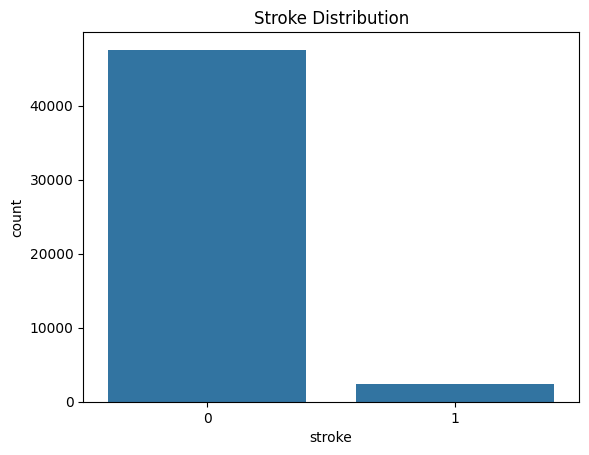

In [43]:
sns.countplot(x='stroke', data=data)
plt.title('Stroke Distribution')
plt.show()

C:\Users\mkhal\AppData\Local\Temp\ipykernel_9800\1339587897.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='gender', palette='Set2')


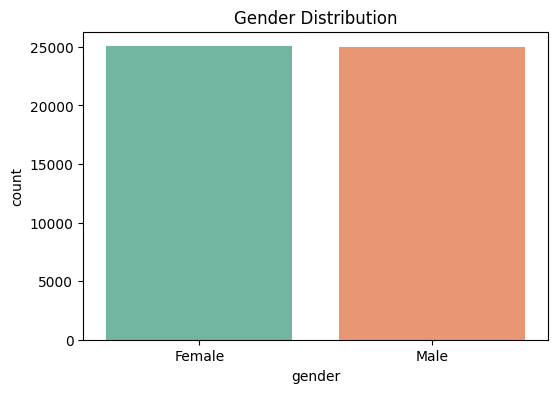

In [44]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='gender', palette='Set2')
plt.title("Gender Distribution")
plt.show()

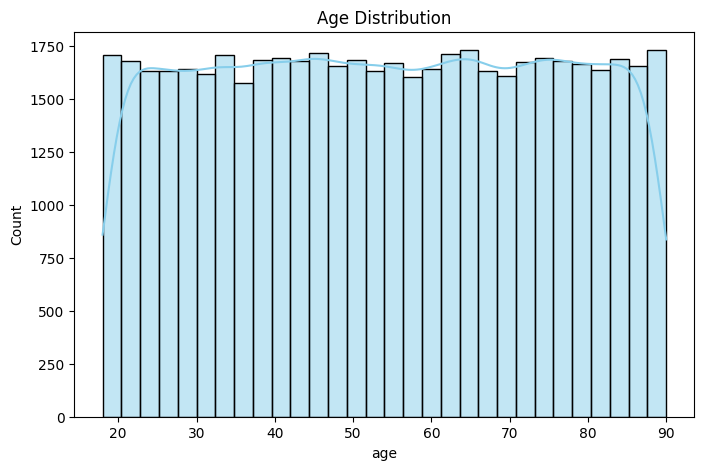

In [45]:
plt.figure(figsize=(8,5))
sns.histplot(data['age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.show()

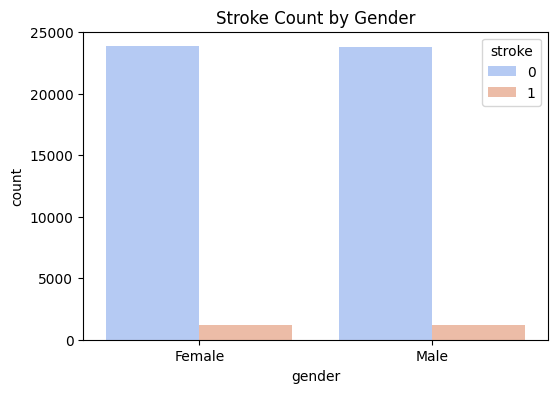

In [46]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='gender', hue='stroke', palette='coolwarm')
plt.title("Stroke Count by Gender")
plt.show()

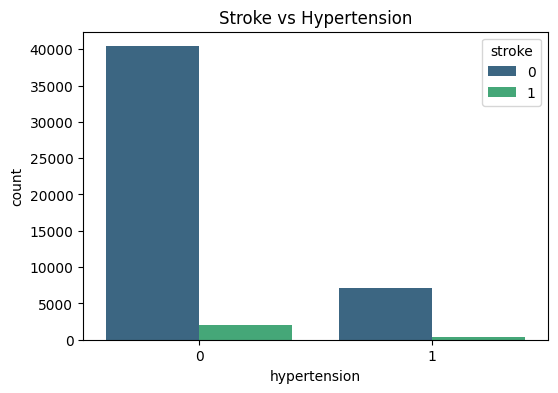

In [47]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='hypertension', hue='stroke', palette='viridis')
plt.title("Stroke vs Hypertension")
plt.show()

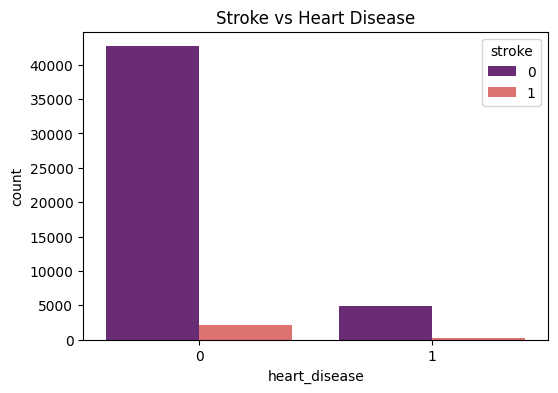

In [48]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='heart_disease', hue='stroke', palette='magma')
plt.title("Stroke vs Heart Disease")
plt.show()

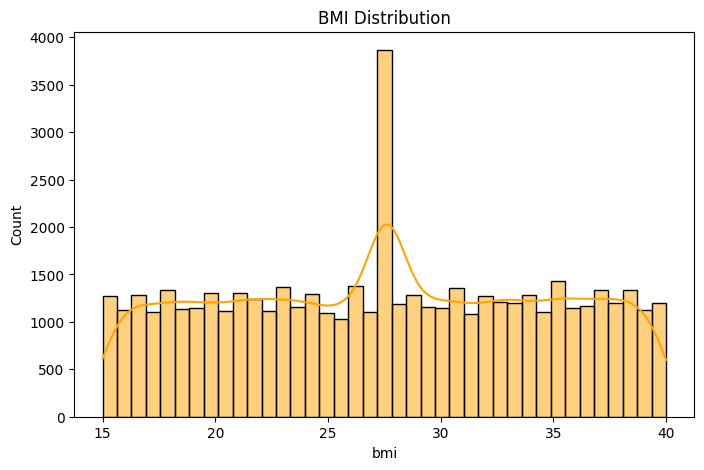

In [49]:
plt.figure(figsize=(8,5))
sns.histplot(data['bmi'].dropna(), kde=True, color='orange')
plt.title("BMI Distribution")
plt.show()

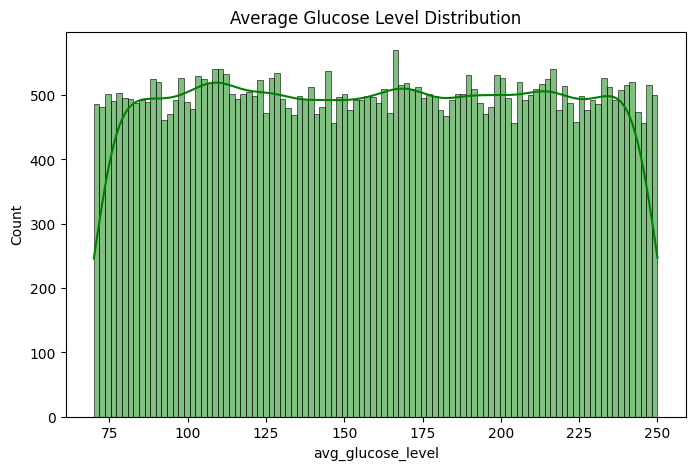

In [50]:
plt.figure(figsize=(8,5))
sns.histplot(data['avg_glucose_level'], bins=100, kde=True, color='green')
plt.title("Average Glucose Level Distribution")
plt.show()

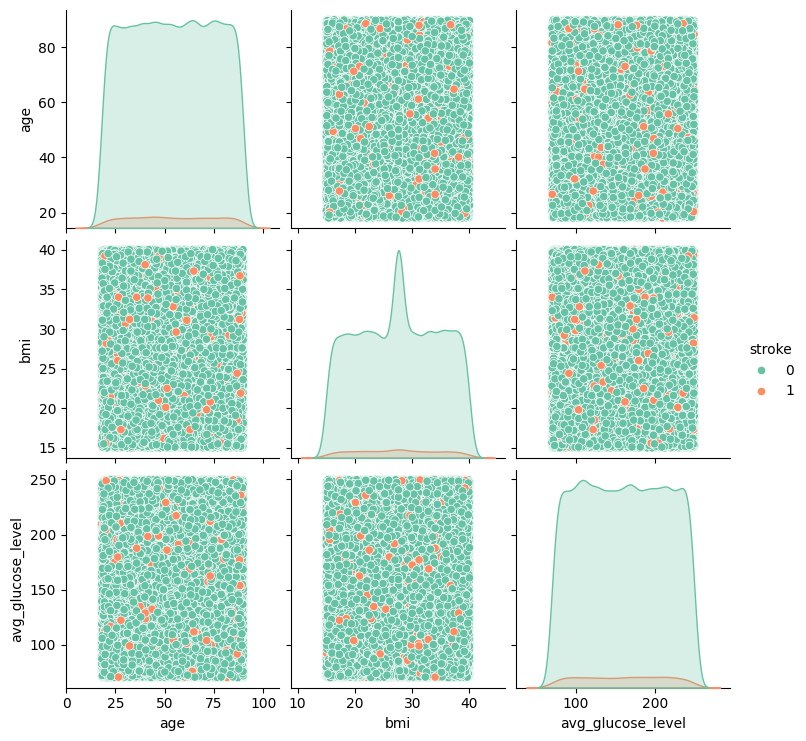

In [51]:
sns.pairplot(data, hue='stroke', vars=['age','bmi','avg_glucose_level'], palette='Set2')
plt.show();

## Data Encoding

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification

In [53]:
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])  
data['ever_married'] = le.fit_transform(data['ever_married'])

data = pd.get_dummies(data, columns=['work_type', 'Residence_type', 'smoking_status'], drop_first=True)

In [54]:
data.head()

id  gender   age  hypertension  heart_disease  ever_married  \
0   1       0  80.3             0              0             1   
1   2       0  89.4             0              0             1   
2   3       1  87.5             0              0             1   
3   4       1  19.7             0              0             1   
4   5       1  85.2             0              0             1   

   avg_glucose_level   bmi  stroke  work_type_Govt_job  work_type_Private  \
0             170.38  18.4       0                True              False   
1             186.89  19.6       0               False              False   
2             118.42  34.7       0               False              False   
3             226.01  27.1       0               False               True   
4             229.64  27.6       0               False              False   

   work_type_Self-employed  Residence_type_Urban  \
0                    False                  True   
1                     True                  True   
2                    False                  True   
3                    False                  True   
4                    False                 False   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                           False                        False   
1                            True                        False   
2                           False                         True   
3                           False                        False   
4                           False                        False   

   smoking_status_smokes  
0                  False  
1                  False  
2                  False  
3                   True  
4                  False

### Over Sampling

In [55]:
data.drop('id', axis=1, inplace=True)

X = data.drop('stroke', axis=1)
y = data['stroke']
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

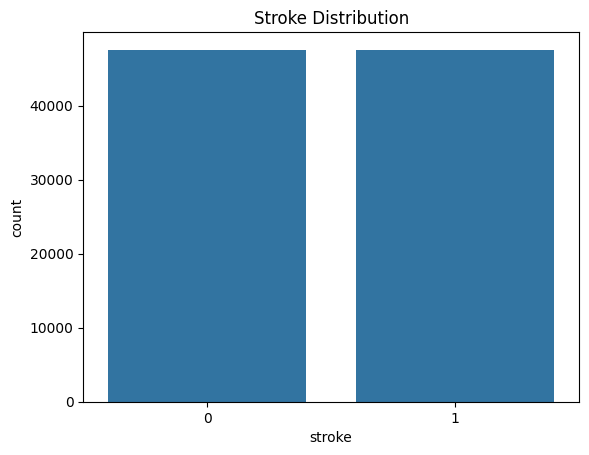

In [59]:
# Merge X_res and y_res
merged_df = pd.concat([X_res, y_res], axis=1)

sns.countplot(x='stroke', data=merged_df)
plt.title('Stroke Distribution')
plt.show()

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [61]:
X_train.shape

(40000, 14)

In [62]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
rf_model = RandomForestClassifier(n_estimators=150, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [64]:
rf_model.predict_proba(X_test_scaled)

array([[0.95333333, 0.04666667],
       [0.87333333, 0.12666667],
       [0.98666667, 0.01333333],
       ...,
       [0.92      , 0.08      ],
       [0.92      , 0.08      ],
       [0.88666667, 0.11333333]], shape=(10000, 2))

In [65]:
y_pred = rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9515


In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      9515
           1       0.00      0.00      0.00       485

    accuracy                           0.95     10000
   macro avg       0.48      0.50      0.49     10000
weighted avg       0.91      0.95      0.93     10000



C:\Users\mkhal\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\mkhal\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\mkhal\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

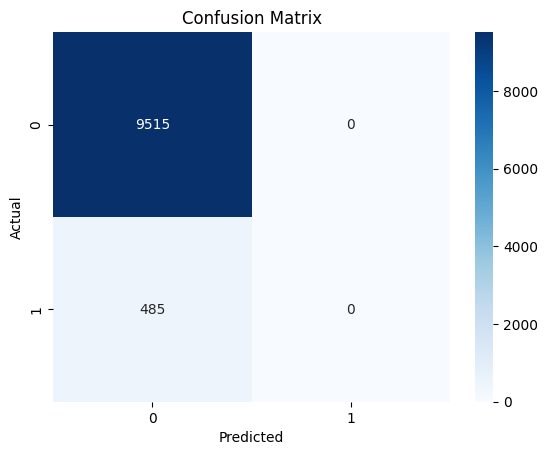

In [67]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()